In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = []
notusing =[
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.0,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.5, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
#    spreading_rate = normal_ci(0.5, 1.5, 20)
    restaurant_count_per_work_district = 10, #100
    #restaurant_capacity_mean = 50,
    #restaurant_capacity_stdev =20,
    blob_infection_rate = 0.1,
    exogenous_infection_rate = 0,
    num_communities = 20,
    num_blobs_to_infect = 1,
    hoprank_infected_sample_ratio = 0.0,
    num_samples_hoprank = 100
)
compute_hoprank = True
sc = 10
num_runs = 1
population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)
run_prefix = "hopranks/HHHRNL-n100-noInf"

params = copy.deepcopy(common_parameters)

Save these seeds if you want to rerun a scenario
[7579]
log initialized
Average similarity between family members is 0.9931661879416851 at temperature -1
Average similarity between family and home is 0.9998972058781714 at temperature -1
Average similarity between students and their classroom is 0.8037827643824343 at temperature -1
Average classroom occupancy is 11.521739130434783 and number classrooms is 23
Average similarity between workers is 0.9985583743074689 at temperature -1
Average office occupancy is 10.53125 and number offices is 64
Average friend similarity for adults: 0.9991969942814383 for kids: 0.8548046747167964
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of

avg restaurant similarity 0.7221339850743846
clumpiness 0.9538222711986414
maxlen 61
giant component 0.797799174690509
disconnects 0.28
avg restaurant similarity 0.5341429293361637
clumpiness 0.9624207796001202
maxlen 60
giant component 0.7475928473177441
disconnects 0.48
avg restaurant similarity 0.6876533036190177
clumpiness 0.9517519434994628
maxlen 53
giant component 0.7475928473177441
disconnects 0.37
avg restaurant similarity 0.5085661649972453
clumpiness 0.9576643052300011
maxlen 56
giant component 0.8500687757909215
disconnects 0.31
avg restaurant similarity 0.6842865190379941
clumpiness 0.9619165419901426
maxlen 55
giant component 0.7475928473177441
disconnects 0.48
avg restaurant similarity 0.5343435147494466
clumpiness 0.9527394161167974
maxlen 55
giant component 0.9009628610729024
disconnects 0.2
avg restaurant similarity 0.5292522747518732
clumpiness 0.9871550116550116
maxlen 18
giant component 0.15611510791366906
disconnects 0.92
avg restaurant similarity 0.54090539942548

avg restaurant similarity 0.5214514243526909
clumpiness 0.9592128181829256
maxlen 43
giant component 0.8500687757909215
disconnects 0.29
avg restaurant similarity 0.7876089464623155
clumpiness 0.9580905065645229
maxlen 47
giant component 0.7475928473177441
disconnects 0.47
avg restaurant similarity 0.6840295230953976
clumpiness 0.9892380952380952
maxlen 10
giant component 0.15827338129496402
disconnects 0.96
avg restaurant similarity 0.46325475758580237
clumpiness 0.9557996787535037
maxlen 47
giant component 0.7475928473177441
disconnects 0.45
avg restaurant similarity 0.6059505400634041
clumpiness 0.9677107803693381
maxlen 44
giant component 0.7475928473177441
disconnects 0.47
avg restaurant similarity 0.603856951702162
clumpiness 0.9619177097038415
maxlen 65
giant component 0.8500687757909215
disconnects 0.21
avg restaurant similarity 0.6698388218288082
clumpiness 0.9544233220254094
maxlen 54
giant component 0.7984869325997249
disconnects 0.38
avg restaurant similarity 0.775865958644

avg restaurant similarity 0.5601150985146793
clumpiness 0.9594478498296728
maxlen 54
giant component 0.8500687757909215
disconnects 0.35
avg restaurant similarity 0.7175717405991074
clumpiness 0.9518927586822011
maxlen 69
giant component 0.7984869325997249
disconnects 0.23
avg restaurant similarity 0.3924772040375908
clumpiness 0.9559690612726259
maxlen 46
giant component 0.7475928473177441
disconnects 0.43
avg restaurant similarity 0.6406660930501158
clumpiness 0.9590081396161976
maxlen 56
giant component 0.7475928473177441
disconnects 0.38
avg restaurant similarity 0.6840113143619869
clumpiness 0.953268664926384
maxlen 43
giant component 0.7984869325997249
disconnects 0.31
avg restaurant similarity 0.41336033730607885
clumpiness 0.9947758820127242
maxlen 19
giant component 0.12446043165467625
disconnects 0.96
avg restaurant similarity 0.7138412275101681
clumpiness 0.964748449479653
maxlen 50
giant component 0.7984869325997249
disconnects 0.36
avg restaurant similarity 0.4491658076063

avg restaurant similarity 0.535960458939428
clumpiness 0.9609186597660875
maxlen 43
giant component 0.7475928473177441
disconnects 0.44
avg restaurant similarity 0.49536440626495043
clumpiness 0.9993333333333333
maxlen 15
giant component 0.15683453237410072
disconnects 0.99
avg restaurant similarity 0.5830344242914133
clumpiness 0.9698034548354779
maxlen 41
giant component 0.7475928473177441
disconnects 0.5
avg restaurant similarity 0.7866251898422492
clumpiness 0.9678766078206731
maxlen 54
giant component 0.7475928473177441
disconnects 0.47
avg restaurant similarity 0.7646539937168549
clumpiness 0.9534654909725331
maxlen 51
giant component 0.9009628610729024
disconnects 0.2
avg restaurant similarity 0.7773588996892649
clumpiness 0.9522209218792782
maxlen 65
giant component 0.8500687757909215
disconnects 0.2
avg restaurant similarity 0.4780435659839694
clumpiness 0.9514908749784226
maxlen 53
giant component 0.7984869325997249
disconnects 0.35
avg restaurant similarity 0.461998649349983

avg restaurant similarity 0.5872227117242103
clumpiness 0.9611259310882732
maxlen 46
giant component 0.7475928473177441
disconnects 0.42
avg restaurant similarity 0.5863657040770909
clumpiness 0.9602779717476105
maxlen 60
giant component 0.7475928473177441
disconnects 0.34
avg restaurant similarity 0.520778125616146
clumpiness 0.9718634389370387
maxlen 66
giant component 0.7475928473177441
disconnects 0.48
avg restaurant similarity 0.5408303372973706
clumpiness 0.9582907169846008
maxlen 59
giant component 0.8500687757909215
disconnects 0.23
avg restaurant similarity 0.5799537339771271
clumpiness 0.9927380952380952
maxlen 7
giant component 0.12805755395683452
disconnects 0.97
avg restaurant similarity 0.5917284069752037
clumpiness 0.9575230280545357
maxlen 55
giant component 0.7475928473177441
disconnects 0.33
avg restaurant similarity 0.6226013530043144
clumpiness 0.9438457304270929
maxlen 46
giant component 0.8500687757909215
disconnects 0.23
avg restaurant similarity 0.62542402474563

avg restaurant similarity 0.5377097265511958
clumpiness 0.9957556910681911
maxlen 32
giant component 0.24532374100719426
disconnects 0.94
avg restaurant similarity 0.7560121862072164
clumpiness 0.9639984730295235
maxlen 54
giant component 0.7469050894085282
disconnects 0.46
avg restaurant similarity 0.6251392088453062
clumpiness 0.9609551798119489
maxlen 47
giant component 0.7984869325997249
disconnects 0.35
avg restaurant similarity 0.6463040078993675
clumpiness 0.9646268326222002
maxlen 60
giant component 0.7475928473177441
disconnects 0.41
avg restaurant similarity 0.37578568360293313
clumpiness 0.9663586526602319
maxlen 61
giant component 0.7462173314993122
disconnects 0.37
avg restaurant similarity 0.6877336187761467
clumpiness 0.9513578491756722
maxlen 49
giant component 0.7475928473177441
disconnects 0.36
avg restaurant similarity 0.6282959434815487
clumpiness 0.9517226173969503
maxlen 70
giant component 0.8500687757909215
disconnects 0.21
avg restaurant similarity 0.59701453884

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.917911111111111]
min:
0.917911111111111
max:
0.917911111111111
std:
0.0
mean:
0.917911111111111
median:
0.917911111111111
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.0061777777777777786]
min:
0.0061777777777777786
max:
0.0061777777777777786
std:
0.0
mean:
0.0061777777777777786
median:
0.0061777777777777786
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.0651611111111111]
min:
0.0651611111111111
max:
0.0651611111111111
std:
0.0
mean:
0.0651611111111111
median:
0.0651611111111111
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.0013611111111111113]
min:
0.0013611111111111113
max:
0.0013611111111111113
std:
0.0
mean:
0.0013611111111111113
median:
0.0013611111111111113
95% confidence interval for the mean:
(nan,nan)
using average of time series:
st

(<function dict.items>, <function dict.items>, <function dict.items>)

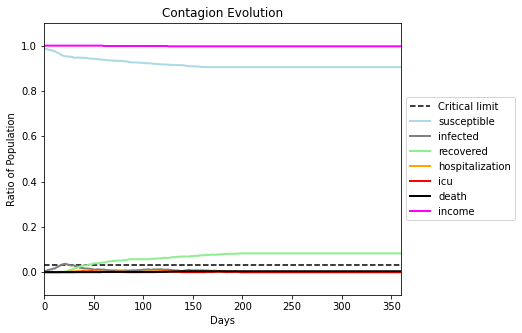

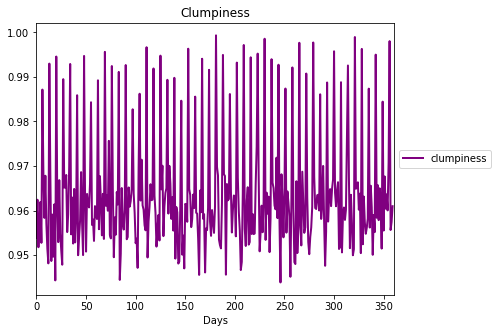

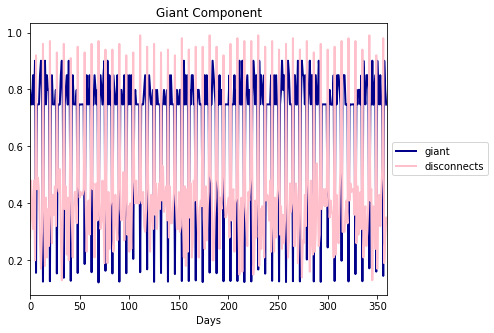

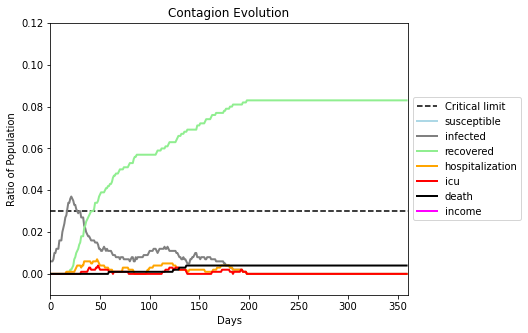

In [4]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[8695]
Average similarity between family members is 0.9900539924259887 at temperature -0.999
Average similarity between family and home is 0.9998963096706728 at temperature -1
Average similarity between students and their classroom is 0.7551826511737544 at temperature -0.999
Average classroom occupancy is 13.363636363636363 and number classrooms is 22
Average similarity between workers is 0.9790969951251253 at temperature -0.999
Average office occupancy is 10.107692307692307 and number offices is 65
Average friend similarity for adults: 0.998464504731757 for kids: 0.8047326198984214
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Tot

avg restaurant similarity 0.6604020650397968
clumpiness 0.9249769393011842
maxlen 31
giant component 0.9917241379310345
disconnects 0.01
avg restaurant similarity 0.7321828884226335
clumpiness 0.9386347343673042
maxlen 32
giant component 0.8929558011049724
disconnects 0.22
avg restaurant similarity 0.7164474081826124
clumpiness 0.9382565459967077
maxlen 34
giant component 0.9413793103448276
disconnects 0.1
avg restaurant similarity 0.6322904860283386
clumpiness 0.9339805617508412
maxlen 34
giant component 0.8916494133885439
disconnects 0.17
avg restaurant similarity 0.8125850037646789
clumpiness 0.9406948111504407
maxlen 35
giant component 0.9413793103448276
disconnects 0.16
avg restaurant similarity 0.6832972560409888
clumpiness 0.9409413814494096
maxlen 32
giant component 0.9413793103448276
disconnects 0.14
avg restaurant similarity 0.6591119552857443
clumpiness 0.9766858961884057
maxlen 29
giant component 0.39422382671480144
disconnects 0.77
avg restaurant similarity 0.7436771421247

clumpiness 0.9309227834374867
maxlen 34
giant component 0.9917241379310345
disconnects 0.03
avg restaurant similarity 0.6981693479534612
clumpiness 0.9137454887896153
maxlen 31
giant component 0.9917241379310345
disconnects 0.02
avg restaurant similarity 0.7345118411061416
clumpiness 0.9757853910795087
maxlen 33
giant component 0.4252707581227437
disconnects 0.84
avg restaurant similarity 0.6624807128820485
clumpiness 0.9242214594267995
maxlen 32
giant component 0.9917241379310345
disconnects 0.01
avg restaurant similarity 0.6600427951345385
clumpiness 0.9314461677370968
maxlen 33
giant component 0.9413388543823327
disconnects 0.13
avg restaurant similarity 0.6156321416618175
clumpiness 0.9242738476931183
maxlen 33
giant component 0.9917241379310345
disconnects 0.03
avg restaurant similarity 0.6279274047729945
clumpiness 0.9236953339476921
maxlen 30
giant component 0.9917241379310345
disconnects 0.01
avg restaurant similarity 0.6519953806656797
clumpiness 0.9303980158975362
maxlen 33
g

clumpiness 0.93518081995171
maxlen 33
giant component 0.8902691511387164
disconnects 0.21
avg restaurant similarity 0.7307980561279317
clumpiness 0.9303015963436864
maxlen 37
giant component 0.9413793103448276
disconnects 0.09
avg restaurant similarity 0.6805906208788113
clumpiness 0.9326956904520052
maxlen 32
giant component 0.9413793103448276
disconnects 0.19
avg restaurant similarity 0.7163808501611632
clumpiness 0.9274232026864588
maxlen 34
giant component 0.9441379310344827
disconnects 0.12
avg restaurant similarity 0.6289601546283643
clumpiness 0.9273663995426068
maxlen 33
giant component 0.9413793103448276
disconnects 0.08
avg restaurant similarity 0.7046573355441008
clumpiness 0.9761505833725167
maxlen 29
giant component 0.4808664259927798
disconnects 0.74
avg restaurant similarity 0.6033402407645249
clumpiness 0.9363973911527912
maxlen 34
giant component 0.9917241379310345
disconnects 0.04
avg restaurant similarity 0.6217791125701606
clumpiness 0.9426280929058741
maxlen 32
gia

clumpiness 0.9378313955131466
maxlen 35
giant component 0.8895790200138026
disconnects 0.21
avg restaurant similarity 0.6873467621866445
clumpiness 0.9817611832611832
maxlen 15
giant component 0.24259927797833936
disconnects 0.87
avg restaurant similarity 0.6886298169571704
clumpiness 0.9324756449074283
maxlen 29
giant component 0.9413793103448276
disconnects 0.13
avg restaurant similarity 0.6502428715648505
clumpiness 0.9193616799684927
maxlen 33
giant component 0.9917241379310345
disconnects 0.0
avg restaurant similarity 0.7302003485211198
clumpiness 0.916105025568371
maxlen 32
giant component 0.9917241379310345
disconnects 0.01
avg restaurant similarity 0.6974534764730443
clumpiness 0.9334684313374931
maxlen 31
giant component 0.9937888198757764
disconnects 0.0
avg restaurant similarity 0.602247625450364
clumpiness 0.9299418075151161
maxlen 31
giant component 0.8931034482758621
disconnects 0.18
avg restaurant similarity 0.5938736350078361
clumpiness 0.9446564804229192
maxlen 31
gian

avg restaurant similarity 0.619890498345393
clumpiness 0.9425627600909635
maxlen 35
giant component 0.8910344827586207
disconnects 0.19
avg restaurant similarity 0.647043096366242
clumpiness 0.9291739746277259
maxlen 37
giant component 0.9413388543823327
disconnects 0.18
avg restaurant similarity 0.6721323428380006
clumpiness 0.9336234160266101
maxlen 29
giant component 0.9917241379310345
disconnects 0.05
avg restaurant similarity 0.6567871756865375
clumpiness 0.9814145979555716
maxlen 29
giant component 0.4490974729241877
disconnects 0.79
avg restaurant similarity 0.5993771678618058
clumpiness 0.9368725064061444
maxlen 31
giant component 0.9406896551724138
disconnects 0.1
avg restaurant similarity 0.6722805618303302
clumpiness 0.9374407996028074
maxlen 32
giant component 0.9413793103448276
disconnects 0.13
avg restaurant similarity 0.7414798198237257
clumpiness 0.9318915689485496
maxlen 31
giant component 0.9434092477570738
disconnects 0.1
avg restaurant similarity 0.6567937848574913


avg restaurant similarity 0.6963803354127212
clumpiness 0.926692492209759
maxlen 34
giant component 0.9434482758620689
disconnects 0.1
avg restaurant similarity 0.6866322211416741
clumpiness 0.933681089696832
maxlen 37
giant component 0.8903448275862069
disconnects 0.16
avg restaurant similarity 0.679305610469225
clumpiness 0.9290374057863489
maxlen 33
giant component 0.9917241379310345
disconnects 0.03
avg restaurant similarity 0.6613402130854041
clumpiness 0.9247387024402453
maxlen 29
giant component 0.9944827586206897
disconnects 0.02
avg restaurant similarity 0.6773467056700587
clumpiness 0.9304199952388496
maxlen 30
giant component 0.9413793103448276
disconnects 0.07
avg restaurant similarity 0.6465890380239221
clumpiness 0.9176572534365852
maxlen 32
giant component 0.9420689655172414
disconnects 0.13
avg restaurant similarity 0.6925858202360983
clumpiness 0.9828043246290958
maxlen 25
giant component 0.48014440433212996
disconnects 0.83
avg restaurant similarity 0.7166964935873967

(<function dict.items>, <function dict.items>, <function dict.items>)

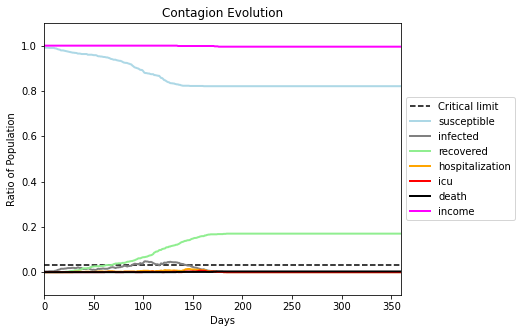

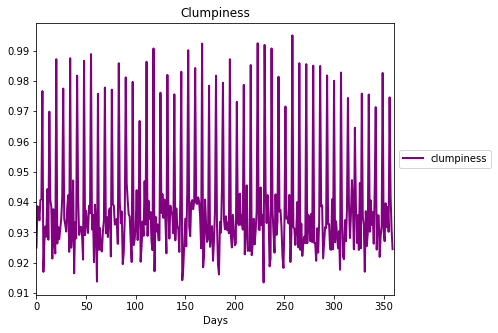

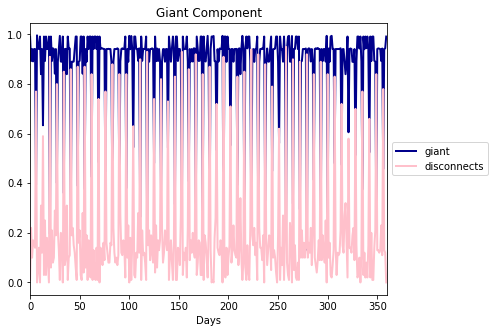

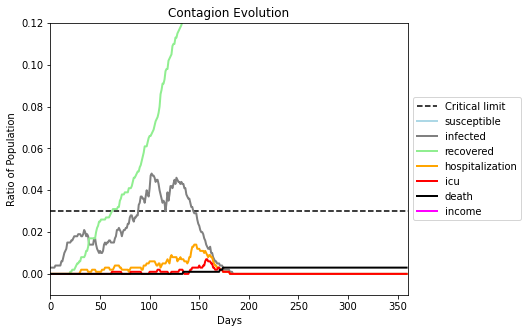

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.999", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )

Save these seeds if you want to rerun a scenario
[3233]
Average similarity between family members is 0.994666937166826 at temperature -0.998
Average similarity between family and home is 0.9998999107237732 at temperature -1
Average similarity between students and their classroom is 0.7589910171812173 at temperature -0.998
Average classroom occupancy is 12.434782608695652 and number classrooms is 23
Average similarity between workers is 0.9798829978440156 at temperature -0.998
Average office occupancy is 10.359375 and number offices is 64
Average friend similarity for adults: 0.9966235844844095 for kids: 0.817864970078661
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 4 people.
Total of 4 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 pe

avg restaurant similarity 0.5577004108255791
clumpiness 0.9648949352617543
maxlen 33
giant component 0.6457615437629222
disconnects 0.56
avg restaurant similarity 0.525492231892748
clumpiness 0.9395374106672175
maxlen 31
giant component 0.8917987594762233
disconnects 0.27
avg restaurant similarity 0.5588989197801738
clumpiness 0.9568090065650438
maxlen 27
giant component 0.45210199862164024
disconnects 0.63
avg restaurant similarity 0.551312293222916
clumpiness 0.9509716658996952
maxlen 35
giant component 0.7953135768435562
disconnects 0.31
avg restaurant similarity 0.5774058703109701
clumpiness 0.9376226821654494
maxlen 29
giant component 0.7953135768435562
disconnects 0.33
avg restaurant similarity 0.5944885584873955
clumpiness 0.9537765657837672
maxlen 28
giant component 0.7070985527222605
disconnects 0.42
avg restaurant similarity 0.5001717453437958
clumpiness 0.9864179292929293
maxlen 18
giant component 0.2725306416726748
disconnects 0.89
avg restaurant similarity 0.67517491833840

avg restaurant similarity 0.5452135108944329
clumpiness 0.9660437165174007
maxlen 24
giant component 0.45210199862164024
disconnects 0.67
avg restaurant similarity 0.6238609810037357
clumpiness 0.9477864520753987
maxlen 34
giant component 0.7953135768435562
disconnects 0.36
avg restaurant similarity 0.4958354220208537
clumpiness 0.9881037199252697
maxlen 29
giant component 0.3354978354978355
disconnects 0.87
avg restaurant similarity 0.4751384307948607
clumpiness 0.9590966567271588
maxlen 30
giant component 0.6457615437629222
disconnects 0.51
avg restaurant similarity 0.5302824153734017
clumpiness 0.953839370722521
maxlen 32
giant component 0.6457615437629222
disconnects 0.53
avg restaurant similarity 0.6256343677435532
clumpiness 0.9701247459890683
maxlen 35
giant component 0.6457615437629222
disconnects 0.65
avg restaurant similarity 0.5128675901139628
clumpiness 0.9309811935594063
maxlen 36
giant component 0.9000689179875948
disconnects 0.18
avg restaurant similarity 0.6172402966118

avg restaurant similarity 0.7180121726060925
clumpiness 0.9545728086476573
maxlen 25
giant component 0.6023432115782219
disconnects 0.56
avg restaurant similarity 0.6677386220319503
clumpiness 0.9639220780853134
maxlen 25
giant component 0.6023432115782219
disconnects 0.63
avg restaurant similarity 0.7128512039299767
clumpiness 0.949046697614396
maxlen 37
giant component 0.850447966919366
disconnects 0.24
avg restaurant similarity 0.6900053900482935
clumpiness 0.947762995533355
maxlen 24
giant component 0.698828394210889
disconnects 0.5
avg restaurant similarity 0.6942849837406562
clumpiness 0.9710579281829282
maxlen 22
giant component 0.45210199862164024
disconnects 0.71
avg restaurant similarity 0.4963914421686441
clumpiness 0.9826604702487055
maxlen 20
giant component 0.18745493871665464
disconnects 0.88
avg restaurant similarity 0.6097092327150347
clumpiness 0.9540191474272978
maxlen 31
giant component 0.6574776016540317
disconnects 0.57
avg restaurant similarity 0.586602333801102


avg restaurant similarity 0.5105282574565918
clumpiness 0.9447515675626105
maxlen 32
giant component 0.7946243969676086
disconnects 0.41
avg restaurant similarity 0.5748416877921632
clumpiness 0.9850198412698413
maxlen 15
giant component 0.17375630857966834
disconnects 0.89
avg restaurant similarity 0.5810620795550797
clumpiness 0.9490284795728294
maxlen 27
giant component 0.6519641626464507
disconnects 0.43
avg restaurant similarity 0.5414283896608121
clumpiness 0.9645594145855789
maxlen 26
giant component 0.6512749827705031
disconnects 0.59
avg restaurant similarity 0.47971412509703126
clumpiness 0.9509129881247562
maxlen 30
giant component 0.6574776016540317
disconnects 0.5
avg restaurant similarity 0.6600340851704225
clumpiness 0.9554566496056961
maxlen 36
giant component 0.7070985527222605
disconnects 0.5
avg restaurant similarity 0.686573303856595
clumpiness 0.9511878081069257
maxlen 20
giant component 0.45210199862164024
disconnects 0.66
avg restaurant similarity 0.6497538902868

avg restaurant similarity 0.5145970524790713
clumpiness 0.960348078821763
maxlen 22
giant component 0.4527911784975879
disconnects 0.61
avg restaurant similarity 0.5331485968119245
clumpiness 0.9476047226979515
maxlen 31
giant component 0.7946243969676086
disconnects 0.39
avg restaurant similarity 0.6296009996024746
clumpiness 0.9537048883298143
maxlen 27
giant component 0.6023432115782219
disconnects 0.54
avg restaurant similarity 0.5574227370996117
clumpiness 0.9627430817783793
maxlen 25
giant component 0.6023432115782219
disconnects 0.58
avg restaurant similarity 0.5912980735137511
clumpiness 0.9790036530884254
maxlen 35
giant component 0.44989185291997114
disconnects 0.75
avg restaurant similarity 0.72303108920776
clumpiness 0.9685705328383347
maxlen 22
giant component 0.45210199862164024
disconnects 0.7
avg restaurant similarity 0.4378038341860352
clumpiness 0.9594554739661985
maxlen 34
giant component 0.7953135768435562
disconnects 0.5
avg restaurant similarity 0.5281636054672156

avg restaurant similarity 0.6531899412029167
clumpiness 0.9850663873163873
maxlen 27
giant component 0.37995674116798844
disconnects 0.87
avg restaurant similarity 0.5991333409524159
clumpiness 0.9530003160753935
maxlen 22
giant component 0.45210199862164024
disconnects 0.65
avg restaurant similarity 0.5187764920545032
clumpiness 0.9663977606048847
maxlen 26
giant component 0.6519641626464507
disconnects 0.56
avg restaurant similarity 0.5292924316368508
clumpiness 0.9502645079098673
maxlen 24
giant component 0.6023432115782219
disconnects 0.52
avg restaurant similarity 0.5141630607111412
clumpiness 0.9667171300921301
maxlen 21
giant component 0.4527911784975879
disconnects 0.75
avg restaurant similarity 0.5753146392218358
clumpiness 0.9551832632451828
maxlen 24
giant component 0.6023432115782219
disconnects 0.56
avg restaurant similarity 0.5897627693796609
clumpiness 0.9619621453681051
maxlen 27
giant component 0.6023432115782219
disconnects 0.56
avg restaurant similarity 0.46315088451

using average of time series:
stats on susceptible:
data: [0.7249083333333333]
min:
0.7249083333333333
max:
0.7249083333333333
std:
0.0
mean:
0.7249083333333333
median:
0.7249083333333333
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.019830555555555553]
min:
0.019830555555555553
max:
0.019830555555555553
std:
0.0
mean:
0.019830555555555553
median:
0.019830555555555553
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.24546944444444443]
min:
0.24546944444444443
max:
0.24546944444444443
std:
0.0
mean:
0.24546944444444443
median:
0.24546944444444443
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.003047222222222222]
min:
0.003047222222222222
max:
0.003047222222222222
std:
0.0
mean:
0.003047222222222222
median:
0.003047222222222222
95% confidence interval for the mean:
(nan,nan)
using average of time series:
st

(<function dict.items>, <function dict.items>, <function dict.items>)

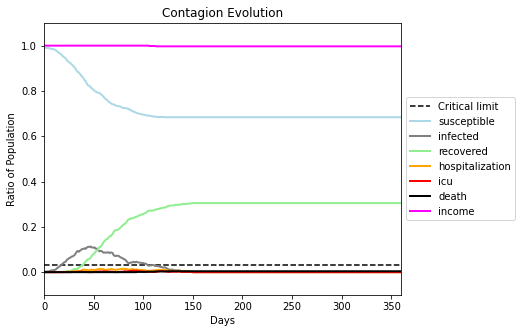

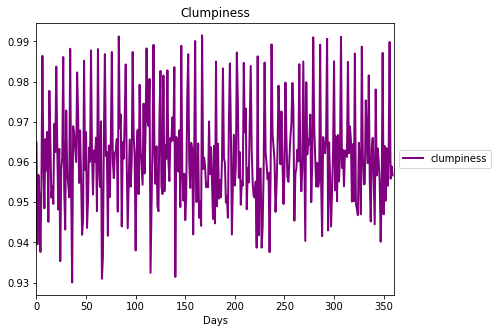

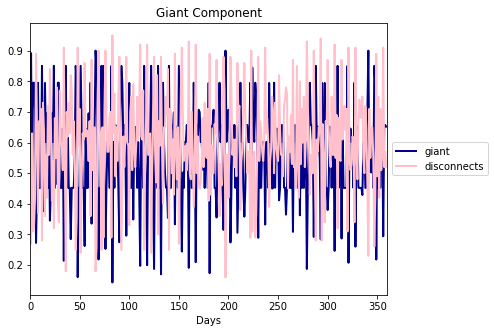

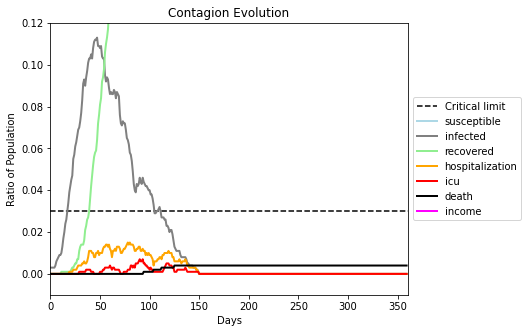

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.998
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.998", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[6028]
Average similarity between family members is 0.9866197862395644 at temperature -0.9975
Average similarity between family and home is 0.9998969948600501 at temperature -1
Average similarity between students and their classroom is 0.7301992489504406 at temperature -0.9975
Average classroom occupancy is 12 and number classrooms is 24
Average similarity between workers is 0.9784963604134687 at temperature -0.9975
Average office occupancy is 10.328125 and number offices is 64
Average friend similarity for adults: 0.9959831938756778 for kids: 0.8345812287174664
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 4 people.
Total of 4 people alloca

avg restaurant similarity 0.6324579344371191
clumpiness 0.9287181812758786
maxlen 31
giant component 0.9490006891798759
disconnects 0.09
avg restaurant similarity 0.5742626213887887
clumpiness 0.9314958369071934
maxlen 33
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.4807342164041286
clumpiness 0.921859882451516
maxlen 31
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.5539493211057148
clumpiness 0.9249431981137124
maxlen 28
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.5610199142337541
clumpiness 0.9223651942548261
maxlen 26
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.6434660177930958
clumpiness 0.9136030542098654
maxlen 27
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.4582963868850962
clumpiness 0.9846907259407259
maxlen 20
giant component 0.33669790915645276
disconnects 0.89
avg restaurant similarity 0.5347538429966713
c

clumpiness 0.9229088822422822
maxlen 34
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.5214069382724182
clumpiness 0.9209510674281572
maxlen 27
giant component 0.9979324603721571
disconnects 0.01
avg restaurant similarity 0.5554034945896182
clumpiness 0.9854953102453102
maxlen 24
giant component 0.39077144917087236
disconnects 0.86
avg restaurant similarity 0.6256543496136323
clumpiness 0.9185787841467803
maxlen 32
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.6903960125346067
clumpiness 0.9266658486600385
maxlen 32
giant component 0.9979324603721571
disconnects 0.01
avg restaurant similarity 0.5788138519897352
clumpiness 0.9240510849757821
maxlen 27
giant component 0.9490006891798759
disconnects 0.07
avg restaurant similarity 0.5554429821343606
clumpiness 0.9231530746462129
maxlen 32
giant component 0.9490006891798759
disconnects 0.06
avg restaurant similarity 0.5074312412546373
clumpiness 0.9348715935748745
maxlen 31
gi

avg restaurant similarity 0.3877621857350049
clumpiness 0.9178669765023775
maxlen 30
giant component 0.9490006891798759
disconnects 0.08
avg restaurant similarity 0.5655784623182554
clumpiness 0.9256825089169517
maxlen 30
giant component 0.9483115093039284
disconnects 0.12
avg restaurant similarity 0.5123619893896902
clumpiness 0.9276689105393642
maxlen 28
giant component 0.9490006891798759
disconnects 0.09
avg restaurant similarity 0.5240296859644393
clumpiness 0.9207353926975939
maxlen 32
giant component 0.9483115093039284
disconnects 0.07
avg restaurant similarity 0.5234610758820721
clumpiness 0.9950793650793651
maxlen 21
giant component 0.14563806777217014
disconnects 0.95
avg restaurant similarity 0.5083506243436441
clumpiness 0.9317142104261333
maxlen 23
giant component 0.9490006891798759
disconnects 0.13
avg restaurant similarity 0.5635533477577339
clumpiness 0.9268390975228317
maxlen 33
giant component 0.9483115093039284
disconnects 0.14
avg restaurant similarity 0.550698406065

avg restaurant similarity 0.6046407712712768
clumpiness 0.9885171356421356
maxlen 16
giant component 0.1802451333813987
disconnects 0.91
avg restaurant similarity 0.500993860329125
clumpiness 0.9170537182083757
maxlen 30
giant component 0.9979324603721571
disconnects 0.01
avg restaurant similarity 0.5073493392084172
clumpiness 0.9286605784452742
maxlen 36
giant component 0.9979324603721571
disconnects 0.01
avg restaurant similarity 0.5570075560829325
clumpiness 0.9201451386889535
maxlen 24
giant component 0.9490006891798759
disconnects 0.1
avg restaurant similarity 0.5109536648814147
clumpiness 0.9115813177965889
maxlen 32
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.5290102115324057
clumpiness 0.9175327369867686
maxlen 23
giant component 0.9979324603721571
disconnects 0.01
avg restaurant similarity 0.5650200848626201
clumpiness 0.9239216385469995
maxlen 33
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.5256527514061011


clumpiness 0.9256817289301817
maxlen 32
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.5062114059610243
clumpiness 0.9201280491000505
maxlen 31
giant component 0.9979324603721571
disconnects 0.01
avg restaurant similarity 0.6067129233814845
clumpiness 0.9319791285099697
maxlen 36
giant component 0.9490006891798759
disconnects 0.12
avg restaurant similarity 0.46088867974462877
clumpiness 0.9899199134199134
maxlen 20
giant component 0.27036770007209804
disconnects 0.91
avg restaurant similarity 0.5179384019329909
clumpiness 0.919547093794134
maxlen 29
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.5643075073457907
clumpiness 0.9238336657901708
maxlen 26
giant component 0.9490006891798759
disconnects 0.1
avg restaurant similarity 0.6410496709077084
clumpiness 0.9280600305267488
maxlen 28
giant component 0.9490006891798759
disconnects 0.13
avg restaurant similarity 0.47832535697648476
clumpiness 0.9252920896322734
maxlen 27
gi

clumpiness 0.9206511607307307
maxlen 30
giant component 0.9490006891798759
disconnects 0.13
avg restaurant similarity 0.41837558271768127
clumpiness 0.9207570460842908
maxlen 25
giant component 0.9490006891798759
disconnects 0.07
avg restaurant similarity 0.44777122320173957
clumpiness 0.9183585212077574
maxlen 28
giant component 0.9979324603721571
disconnects 0.0
avg restaurant similarity 0.4124256764121978
clumpiness 0.9152131162574088
maxlen 31
giant component 0.9979324603721571
disconnects 0.01
avg restaurant similarity 0.6536865366300144
clumpiness 0.9291625005101887
maxlen 30
giant component 0.9490006891798759
disconnects 0.08
avg restaurant similarity 0.6117772888604577
clumpiness 0.924034987155424
maxlen 25
giant component 0.9490006891798759
disconnects 0.09
avg restaurant similarity 0.5020700611412541
clumpiness 0.991987012987013
maxlen 11
giant component 0.13410237923576063
disconnects 0.93
avg restaurant similarity 0.4709914955576461
clumpiness 0.9203335401984698
maxlen 29
g

(<function dict.items>, <function dict.items>, <function dict.items>)

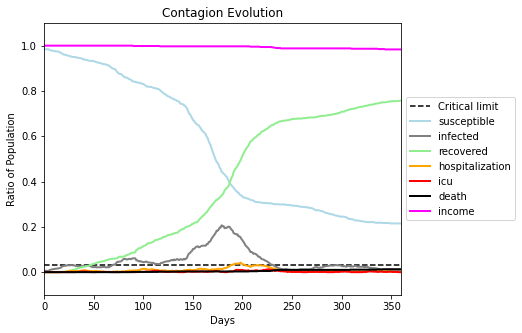

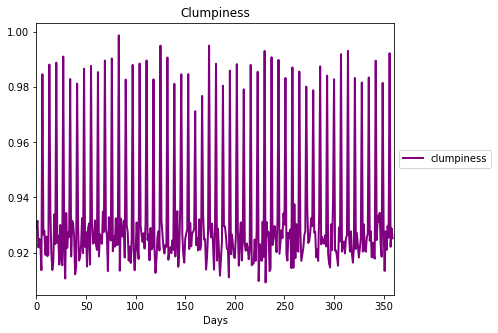

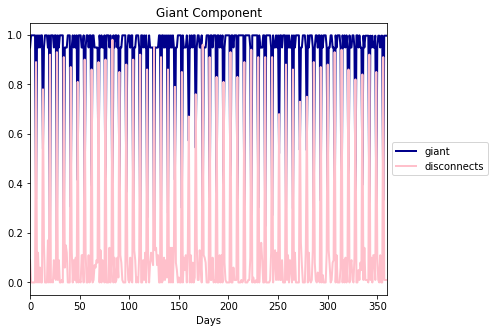

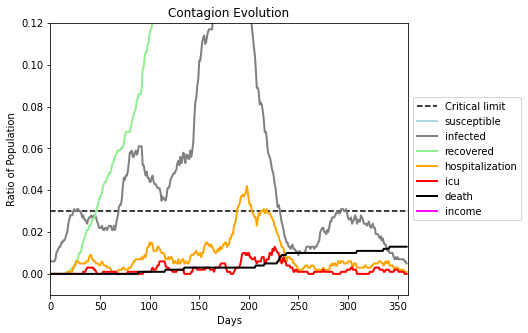

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9975
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.9975", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[4134]
Average similarity between family members is 0.9871889425943247 at temperature -0.997
Average similarity between family and home is 0.9999072678951236 at temperature -1
Average similarity between students and their classroom is 0.7403493472389513 at temperature -0.997
Average classroom occupancy is 10.875 and number classrooms is 24
Average similarity between workers is 0.9687653367494586 at temperature -0.997
Average office occupancy is 10.578125 and number offices is 64
Average friend similarity for adults: 0.9949645533919859 for kids: 0.7814035408376153
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people alloc

avg restaurant similarity 0.49736369466153113
clumpiness 0.9306810724766333
maxlen 39
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.418220189753669
clumpiness 0.9275868899930181
maxlen 36
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6455324933306785
clumpiness 0.9190653754170977
maxlen 33
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.34126690640668367
clumpiness 0.9277563434372338
maxlen 39
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4727196273177293
clumpiness 0.9331937360242161
maxlen 40
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5194099089750435
clumpiness 0.9269900515350219
maxlen 36
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.49127458247386696
clumpiness 0.984598217439959
maxlen 31
giant component 0.3618843683083512
disconnects 0.86
avg restaurant similarity 0.43967414862516907
clumpiness 0.9148754950092526
maxlen 36
giant component 1.0
disconnects 0.0
avg restaurant

avg restaurant similarity 0.565985976376637
clumpiness 0.9316624579111608
maxlen 37
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5352004619533477
clumpiness 0.9289793759196439
maxlen 40
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.44960671043773026
clumpiness 0.9814718627221642
maxlen 31
giant component 0.44539614561027835
disconnects 0.79
avg restaurant similarity 0.4724547056607789
clumpiness 0.9260891283502759
maxlen 36
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6425361644581166
clumpiness 0.9238469161783304
maxlen 32
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5452143940951062
clumpiness 0.9209974592067773
maxlen 40
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4933747310010479
clumpiness 0.920979303658394
maxlen 37
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.30058117467688733
clumpiness 0.9284887622474258
maxlen 32
giant component 1.0
disconnects 0.0
avg restaurant 

clumpiness 0.9331987982736684
maxlen 36
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.39869269973685445
clumpiness 0.9877759591206978
maxlen 41
giant component 0.44039971448965026
disconnects 0.83
avg restaurant similarity 0.41381109033827806
clumpiness 0.9250462767493796
maxlen 38
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.5520634448160301
clumpiness 0.9246594257472107
maxlen 29
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.41009764613284494
clumpiness 0.9311605010095274
maxlen 35
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.4667650872886259
clumpiness 0.9343616862820985
maxlen 39
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.3422193155874238
clumpiness 0.9234361980263304
maxlen 35
giant component 0.9986348122866894
disconnects 0.01
avg restaurant similarity 0.5300665284832717
clumpiness 0.9247941526258663
maxlen 37
gi

clumpiness 0.9225603779033774
maxlen 29
giant component 0.9986348122866894
disconnects 0.02
avg restaurant similarity 0.37030386542567145
clumpiness 0.9299993738430159
maxlen 36
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.43109977800671884
clumpiness 0.9206952203903237
maxlen 35
giant component 0.9986348122866894
disconnects 0.01
avg restaurant similarity 0.43762412131275136
clumpiness 0.9126600799809913
maxlen 28
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.36489617112562894
clumpiness 0.9826430513930514
maxlen 26
giant component 0.3240542469664525
disconnects 0.86
avg restaurant similarity 0.3492802331426825
clumpiness 0.9236105696808845
maxlen 32
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.375381082147112
clumpiness 0.9237439297434862
maxlen 39
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.4470974702443376
clumpiness 0.9339074669661819
maxlen 34
gi

avg restaurant similarity 0.5138677199294943
clumpiness 0.9216596817461776
maxlen 37
giant component 0.9986348122866894
disconnects 0.01
avg restaurant similarity 0.44637996771643157
clumpiness 0.923834864730588
maxlen 34
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.5243169079670251
clumpiness 0.9296301646353933
maxlen 34
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.36445253623590407
clumpiness 0.9126203562998862
maxlen 36
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.5494156684611412
clumpiness 0.9276785778449179
maxlen 37
giant component 0.9986338797814208
disconnects 0.0
avg restaurant similarity 0.510903110513382
clumpiness 0.9290371646611251
maxlen 36
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.3703143918579488
clumpiness 0.9825076279421548
maxlen 37
giant component 0.53604568165596
disconnects 0.72
avg restaurant similarity 0.619623847351933
clum

clumpiness 0.9225509690649111
maxlen 33
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.39093386930258156
clumpiness 0.9289950705599134
maxlen 31
giant component 0.9986348122866894
disconnects 0.01
avg restaurant similarity 0.3356784882641018
clumpiness 0.9823421308373355
maxlen 23
giant component 0.3033547466095646
disconnects 0.82
avg restaurant similarity 0.3767089776143445
clumpiness 0.9229343814107427
maxlen 38
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.3810473318402576
clumpiness 0.9210123360345637
maxlen 33
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.38080683931863213
clumpiness 0.9267526749125408
maxlen 36
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.29863754715467755
clumpiness 0.9291122811646821
maxlen 29
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.4748544153023375
clumpiness 0.9327361208106452
maxlen 38
gia

(<function dict.items>, <function dict.items>, <function dict.items>)

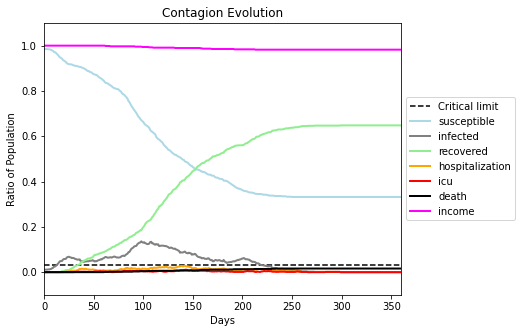

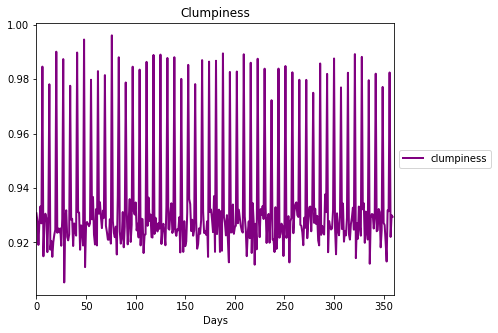

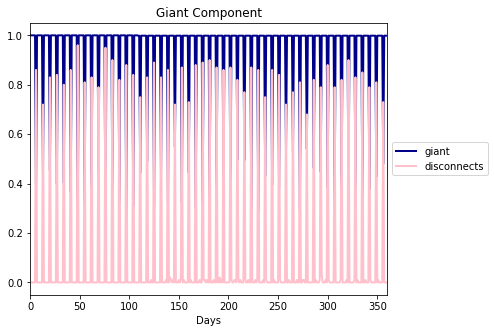

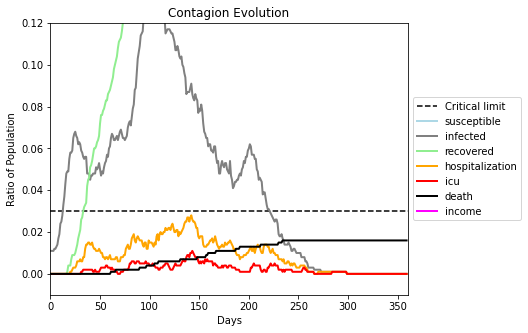

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.997
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.997", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[7895]
Average similarity between family members is 0.988610293418785 at temperature -0.996
Average similarity between family and home is 0.9999043448885434 at temperature -1
Average similarity between students and their classroom is 0.6083649439808773 at temperature -0.996
Average classroom occupancy is 12.666666666666666 and number classrooms is 24
Average similarity between workers is 0.9649755579629018 at temperature -0.996
Average office occupancy is 9.892307692307693 and number offices is 65
Average friend similarity for adults: 0.9942295999896343 for kids: 0.7626109417647423
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Tota

run with seed 7895:
avg restaurant similarity 0.4798787437029855
clumpiness 0.9238875296526361
maxlen 25
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.4194502134269165
clumpiness 0.9197883001027032
maxlen 26
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.4525081553629014
clumpiness 0.9303638876765139
maxlen 30
giant component 0.9454042847270214
disconnects 0.11
avg restaurant similarity 0.3330067377954752
clumpiness 0.9188213661273293
maxlen 23
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.327183296875941
clumpiness 0.9299114979317059
maxlen 23
giant component 0.9453665283540802
disconnects 0.1
avg restaurant similarity 0.4432738286540079
clumpiness 0.9204829450712612
maxlen 25
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.40960188473370174
clumpiness 0.9775063577367813
maxlen 46
giant component 0.6700434153400868
disconnects 0.62
avg restaurant similarity 

avg restaurant similarity 0.40200132095004076
clumpiness 0.9246927313118524
maxlen 30
giant component 0.9986178299930891
disconnects 0.01
avg restaurant similarity 0.48178614919773577
clumpiness 0.9152962381615632
maxlen 21
giant component 0.9454042847270214
disconnects 0.1
avg restaurant similarity 0.3763017236726304
clumpiness 0.9807137209625599
maxlen 22
giant component 0.532561505065123
disconnects 0.75
avg restaurant similarity 0.473433084944208
clumpiness 0.9199010890486998
maxlen 25
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.34060508643228343
clumpiness 0.9320777826983744
maxlen 24
giant component 0.9454042847270214
disconnects 0.14
avg restaurant similarity 0.43202705336260033
clumpiness 0.9200176107422339
maxlen 27
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.3168986433993764
clumpiness 0.9156201730285389
maxlen 30
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.350833678717491

avg restaurant similarity 0.5692762586141573
clumpiness 0.9164629492260332
maxlen 25
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.36805687536684295
clumpiness 0.9244872853194128
maxlen 30
giant component 0.9986178299930891
disconnects 0.01
avg restaurant similarity 0.5168999307133267
clumpiness 0.923874187936969
maxlen 27
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.6331037450528965
clumpiness 0.9126385281814849
maxlen 22
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.29542321949965866
clumpiness 0.9287531929303703
maxlen 26
giant component 0.9454042847270214
disconnects 0.13
avg restaurant similarity 0.44716837490633826
clumpiness 0.9702909943204868
maxlen 27
giant component 0.6316931982633864
disconnects 0.63
avg restaurant similarity 0.5207621986067029
clumpiness 0.921171999064037
maxlen 34
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.562106992946137


clumpiness 0.9258044197781848
maxlen 25
giant component 0.9454042847270214
disconnects 0.13
avg restaurant similarity 0.38305032149605084
clumpiness 0.9682704939556693
maxlen 40
giant component 0.6309696092619392
disconnects 0.63
avg restaurant similarity 0.33787349117179644
clumpiness 0.9260246822750693
maxlen 22
giant component 0.9440221147201106
disconnects 0.15
avg restaurant similarity 0.6845709137849068
clumpiness 0.9179279349641226
maxlen 32
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.5341983781230605
clumpiness 0.930833031288843
maxlen 28
giant component 0.9454042847270214
disconnects 0.12
avg restaurant similarity 0.4906847553545167
clumpiness 0.9324354176091927
maxlen 28
giant component 0.9454042847270214
disconnects 0.09
avg restaurant similarity 0.6872796299733601
clumpiness 0.9095142012895504
maxlen 29
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.37545931518325915
clumpiness 0.9159245594316096
maxlen 23
g

clumpiness 0.9166427510117947
maxlen 24
giant component 0.9454042847270214
disconnects 0.03
avg restaurant similarity 0.402155217963026
clumpiness 0.9138534703189604
maxlen 23
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.272502616860008
clumpiness 0.9310379026930953
maxlen 25
giant component 0.9454042847270214
disconnects 0.1
avg restaurant similarity 0.34206726951234195
clumpiness 0.9234440338356747
maxlen 30
giant component 0.9454042847270214
disconnects 0.06
avg restaurant similarity 0.582318758067732
clumpiness 0.9756057447144428
maxlen 30
giant component 0.5188133140376266
disconnects 0.71
avg restaurant similarity 0.5461308167815476
clumpiness 0.9233283264442742
maxlen 24
giant component 0.9986178299930891
disconnects 0.01
avg restaurant similarity 0.548858309811082
clumpiness 0.9216428569448829
maxlen 25
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.39311296192374134
clumpiness 0.927298681121753
maxlen 25
giant c

avg restaurant similarity 0.37776948611784683
clumpiness 0.9202932661743067
maxlen 26
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.5207592603610525
clumpiness 0.9241880072370011
maxlen 25
giant component 0.9454042847270214
disconnects 0.08
avg restaurant similarity 0.4683522721450258
clumpiness 0.9133022057641287
maxlen 24
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.49326065945324343
clumpiness 0.926122649279548
maxlen 27
giant component 0.9986178299930891
disconnects 0.0
avg restaurant similarity 0.32923187363366513
clumpiness 0.9210965895858378
maxlen 23
giant component 0.9454042847270214
disconnects 0.1
avg restaurant similarity 0.25869069625861546
clumpiness 0.935488540784607
maxlen 26
giant component 0.9453665283540802
disconnects 0.14
avg restaurant similarity 0.5730426613760087
clumpiness 0.9653043255483692
maxlen 30
giant component 0.630246020260492
disconnects 0.55
avg restaurant similarity 0.6097525947823034

(<function dict.items>, <function dict.items>, <function dict.items>)

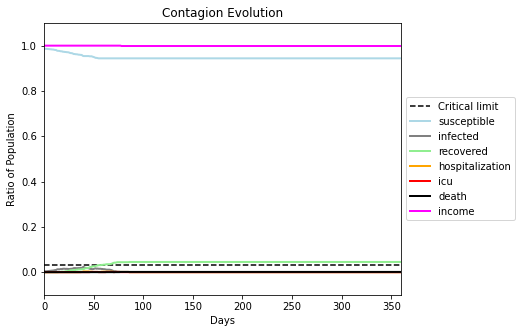

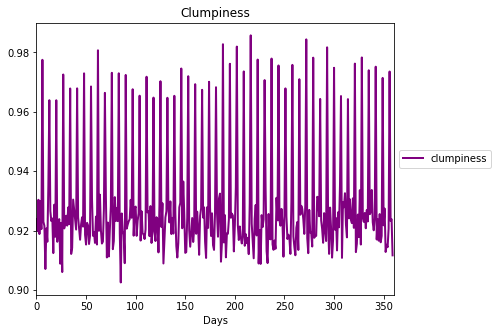

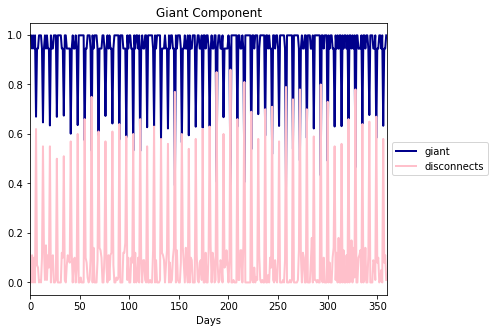

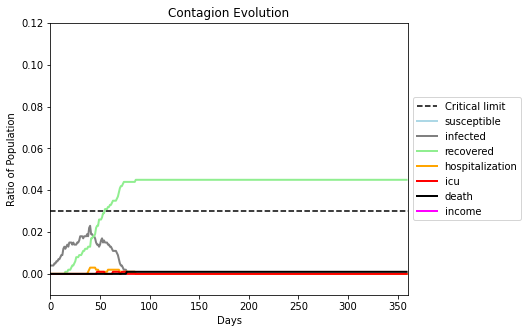

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.996
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.996", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[6091]
Average similarity between family members is 0.9880773480808415 at temperature -0.995
Average similarity between family and home is 0.9998848108533652 at temperature -1
Average similarity between students and their classroom is 0.6703356756410902 at temperature -0.995
Average classroom occupancy is 12.833333333333334 and number classrooms is 24
Average similarity between workers is 0.9819551947463547 at temperature -0.995
Average office occupancy is 10.109375 and number offices is 64
Average friend similarity for adults: 0.9942523565318488 for kids: 0.7486638302435751
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 

avg restaurant similarity 0.47907406604745706
clumpiness 0.9000484282487379
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5923375902819613
clumpiness 0.922382725263076
maxlen 30
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.644134302001141
clumpiness 0.9097546895227236
maxlen 28
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4476310303232812
clumpiness 0.9158534546504689
maxlen 29
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4917271186462541
clumpiness 0.9210359153003129
maxlen 34
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5503048467945967
clumpiness 0.9094419974566554
maxlen 29
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.527580391355813
clumpiness 0.9537226832245542
maxlen 25
giant component 0.719361856417694
disconnects 0.38
avg restaurant similarity 0.5126335178775084
clumpiness 0.9175536132810969
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant simi

avg restaurant similarity 0.6768990123560304
clumpiness 0.9110405579737797
maxlen 32
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6024538727280894
clumpiness 0.9204767693884681
maxlen 31
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.604854505306906
clumpiness 0.9705894427789198
maxlen 23
giant component 0.5337200870195794
disconnects 0.7
avg restaurant similarity 0.7231995544678772
clumpiness 0.9160485952501861
maxlen 29
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5624631434843167
clumpiness 0.9175911241556787
maxlen 30
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4619883801841266
clumpiness 0.9013028741317088
maxlen 32
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.49215579529620784
clumpiness 0.9076017379313079
maxlen 30
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7458741662826338
clumpiness 0.9159432730099406
maxlen 31
giant component 1.0
disconnects 0.0
avg restaurant si

avg restaurant similarity 0.6574139657532858
clumpiness 0.915479611118156
maxlen 27
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5180054790673762
clumpiness 0.9158540325620148
maxlen 28
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6031559636211418
clumpiness 0.9135610140744177
maxlen 34
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.722931479256086
clumpiness 0.9300557988080088
maxlen 30
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6960233520141698
clumpiness 0.904696457845401
maxlen 31
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7029495094157729
clumpiness 0.9600143638486619
maxlen 35
giant component 0.706308919506889
disconnects 0.5
avg restaurant similarity 0.5314733661081259
clumpiness 0.9092124697541881
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5181733333176276
clumpiness 0.9124459426614326
maxlen 28
giant component 1.0
disconnects 0.0
avg restaurant simila

avg restaurant similarity 0.5530722237359694
clumpiness 0.9204392058984752
maxlen 40
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6921966557225343
clumpiness 0.9628093604722154
maxlen 27
giant component 0.6635242929659173
disconnects 0.53
avg restaurant similarity 0.6361401162928139
clumpiness 0.9197366218746885
maxlen 34
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5528176108161181
clumpiness 0.9111730197947251
maxlen 37
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.441462068643138
clumpiness 0.9111271815429004
maxlen 23
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7278137118457747
clumpiness 0.9085451763836438
maxlen 28
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.581219988260683
clumpiness 0.9160180675695262
maxlen 35
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4408914521325935
clumpiness 0.9098448756542512
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant sim

avg restaurant similarity 0.6129766186786664
clumpiness 0.9113093036284247
maxlen 35
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5977720666260626
clumpiness 0.9114719353379604
maxlen 35
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5298320191016099
clumpiness 0.9132039172547788
maxlen 28
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6787130901878912
clumpiness 0.9129416161804588
maxlen 29
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5805264676341282
clumpiness 0.9730182747525727
maxlen 33
giant component 0.6033357505438723
disconnects 0.63
avg restaurant similarity 0.5289476282346972
clumpiness 0.9170251383670909
maxlen 31
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4677477313719682
clumpiness 0.9190127113124085
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6492798870853851
clumpiness 0.9173179728119879
maxlen 32
giant component 1.0
disconnects 0.0
avg restaurant s

avg restaurant similarity 0.5669441338494715
clumpiness 0.9534528689846868
maxlen 27
giant component 0.7142857142857143
disconnects 0.49
avg restaurant similarity 0.48316873988478115
clumpiness 0.9100139797002228
maxlen 27
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4562583331586091
clumpiness 0.9117978418348782
maxlen 30
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6399804734243975
clumpiness 0.9142850294871967
maxlen 26
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6091817098417818
clumpiness 0.9165596408534558
maxlen 28
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4356096971618142
clumpiness 0.9110962646464229
maxlen 28
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5491957141637701
clumpiness 0.9068846142452447
maxlen 31
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7000604730479794
clumpiness 0.9583804366088688
maxlen 31
giant component 0.7077592458303118
disconnects 0.47

(<function dict.items>, <function dict.items>, <function dict.items>)

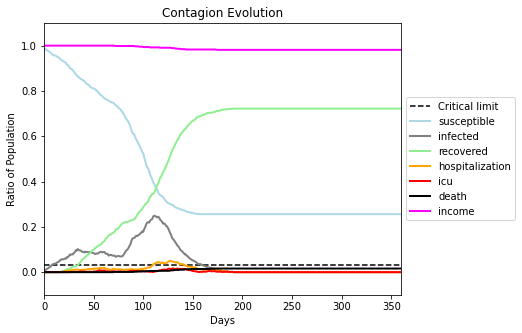

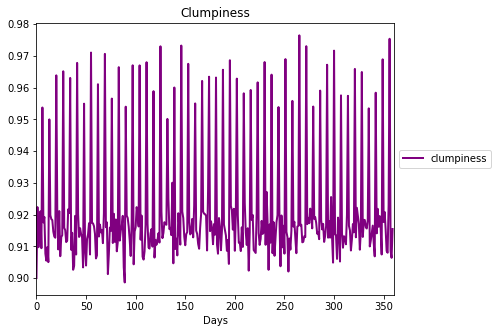

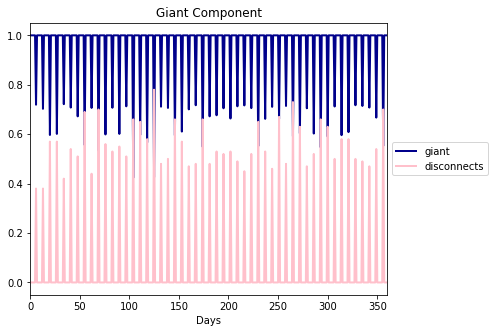

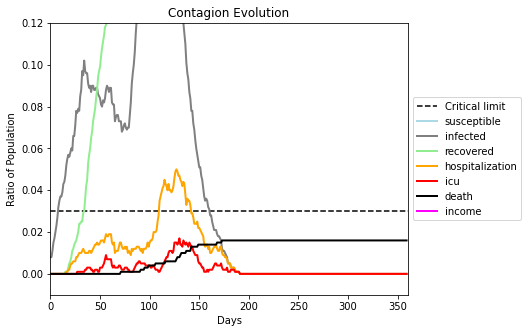

In [10]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.995
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.995", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.994
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.994", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[458]
Average similarity between family members is 0.982570068289421 at temperature -0.994
Average similarity between family and home is 0.9999024172843859 at temperature -1
Average similarity between students and their classroom is 0.53315152899211 at temperature -0.994
Average classroom occupancy is 12.375 and number classrooms is 24
Average similarity between workers is 0.90409414848717 at temperature -0.994
Average office occupancy is 10.076923076923077 and number offices is 65
Average friend similarity for adults: 0.9770923121996256 for kids: 0.6971800222148088
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people al

avg restaurant similarity 0.417547175518145


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.993
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.993", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.992
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.992", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.991
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.991", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.99
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.99", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.98
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.989", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.97
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.97", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )
